In [39]:
%autosave 0

Autosave disabled


In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
pd.set_option('display.max_columns', 100)
sns.set(style='darkgrid')

In [42]:
# pandas reads empty csv columns (',,') as 'Unnamed N' where N is the column number
def is_named(row):
    return not row.lower().startswith('unnamed')

In [43]:
def lower(element):
    return element.lower() if type(element) == str else element

In [44]:
def load(csv_path):
    df = pd.read_csv(csv_path, usecols=is_named)
    df.columns = df.columns.str.lower()
    df = df.applymap(lower)

    return df

In [45]:
df = load('data/2018.csv')
df.head()

,gameid,gamedate,quarter,minute,second,offenseteam,defenseteam,down,togo,yardline,seriesfirstdown,nextscore,description,teamwin,seasonyear,yards,formation,playtype,isrush,ispass,isincomplete,istouchdown,passtype,issack,ischallenge,ischallengereversed,challenger,ismeasurement,isinterception,isfumble,ispenalty,istwopointconversion,istwopointconversionsuccessful,rushdirection,yardlinefixed,yardlinedirection,ispenaltyaccepted,penaltyteam,isnoplay,penaltytype,penaltyyards
0,2018092400,2018-09-24,1,0,45,pit,tb,1,10,66,0,0,(:45) 22-s.ridley right tackle to tb 28 for 6 ...,0,2018,6,under center,rush,1,0,0,0,NaN,0,0,0,NaN,0,0,0,0,0,0,right tackle,34,opp,0,NaN,0,NaN,0
1,2018092400,2018-09-24,1,2,10,tb,pit,4,17,64,0,0,"(2:10) 9-b.anger punts 28 yards to pit 8, cent...",0,2018,0,punt,punt,0,0,0,0,NaN,0,0,0,NaN,0,0,0,0,0,0,NaN,36,opp,0,NaN,0,NaN,0
2,2018092400,2018-09-24,1,2,48,tb,pit,3,8,73,0,0,(2:48) (shotgun) 14-r.fitzpatrick sacked at pi...,0,2018,-9,shotgun,sack,0,0,0,0,NaN,1,0,0,NaN,0,0,0,0,0,0,NaN,27,opp,0,NaN,0,NaN,0
3,2018092400,2018-09-24,1,2,53,tb,pit,2,8,73,0,0,(2:53) (shotgun) 14-r.fitzpatrick pass incompl...,0,2018,0,shotgun,pass,0,1,1,0,short middle,0,0,0,NaN,0,0,0,0,0,0,NaN,27,opp,0,NaN,0,NaN,0
4,2018092400,2018-09-24,1,3,32,tb,pit,1,10,71,0,0,(3:32) (shotgun) 25-p.barber up the middle to ...,0,2018,2,shotgun,rush,1,0,0,0,NaN,0,0,0,NaN,0,0,0,0,0,0,center,29,opp,0,NaN,0,NaN,0


In [46]:
df.gameid.nunique()

48

In [47]:
len(df)

8676

In [48]:
df.playtype.value_counts()

pass                    3627
rush                    2259
kick off                 497
punt                     468
timeout                  394
sack                     264
extra point              232
field goal               176
no play                  170
scramble                 156
qb kneel                  63
two-point conversion      24
fumbles                   20
clock stop                19
exception                 12
penalty                    2
Name: playtype, dtype: int64

In [49]:
df.formation.value_counts()

shotgun              3723
under center         3555
no huddle shotgun     477
punt                  452
field goal            176
no huddle             146
Name: formation, dtype: int64

In [50]:
len(df[df.isrush == True])

2415

In [51]:
df.rushdirection.value_counts()

center          675
left end        303
right guard     273
left tackle     269
left guard      250
right end       245
right tackle    244
Name: rushdirection, dtype: int64

In [52]:
len(df[df.ispass == True])

3627

In [53]:
df.passtype.value_counts()

short right       1152
short left        1083
short middle       716
deep right         270
deep left          256
deep middle        148
intercepted by       1
Name: passtype, dtype: int64

In [54]:
len(df[df.istouchdown == True])

279

In [55]:
len(df[df.playtype == 'field goal'])

176

In [56]:
len(df[df.isinterception == True])

93

In [57]:
len(df[df.isfumble == True])

128

In [58]:
len(df[df.issack == True])

264

In [59]:
len(df[df.ispenalty == True])

783

In [60]:
df.offenseteam.value_counts()

bal    294
pit    287
cle    282
phi    280
det    266
was    265
no     260
gb     260
la     257
hou    257
chi    257
oak    257
den    254
min    253
tb     251
car    250
atl    248
kc     248
ind    247
nyg    246
buf    246
cin    246
sf     245
sea    243
nyj    242
ten    239
jax    237
lac    234
ne     226
dal    218
mia    214
ari    180
Name: offenseteam, dtype: int64

In [61]:
df.defenseteam.value_counts()

pit    313
sf     304
kc     303
cin    303
ne     292
min    288
ind    288
dal    287
atl    286
ari    281
buf    280
sea    278
hou    277
bal    276
lac    275
nyj    275
cle    274
tb     272
mia    270
gb     268
ten    264
no     263
den    261
nyg    257
phi    254
jax    253
chi    252
oak    250
car    241
det    238
was    231
la     222
Name: defenseteam, dtype: int64

In [62]:
len(df.defenseteam.value_counts())

32

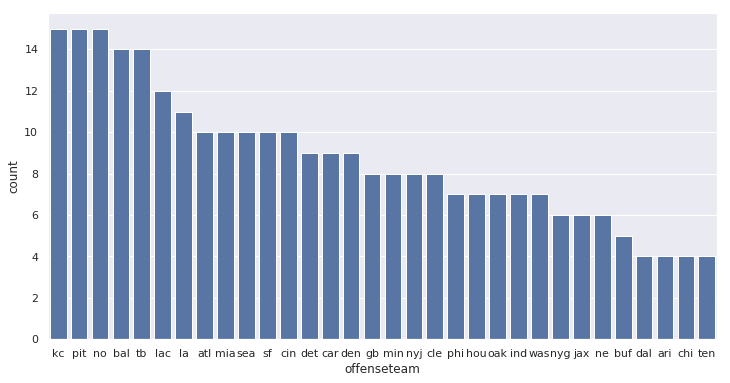

In [73]:
f, ax = plt.subplots(figsize=(12, 6))
td_df = df[df.istouchdown == True]
sns.countplot(x='offenseteam', data=td_df, order=td_df.offenseteam.value_counts().index, color='b')